   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


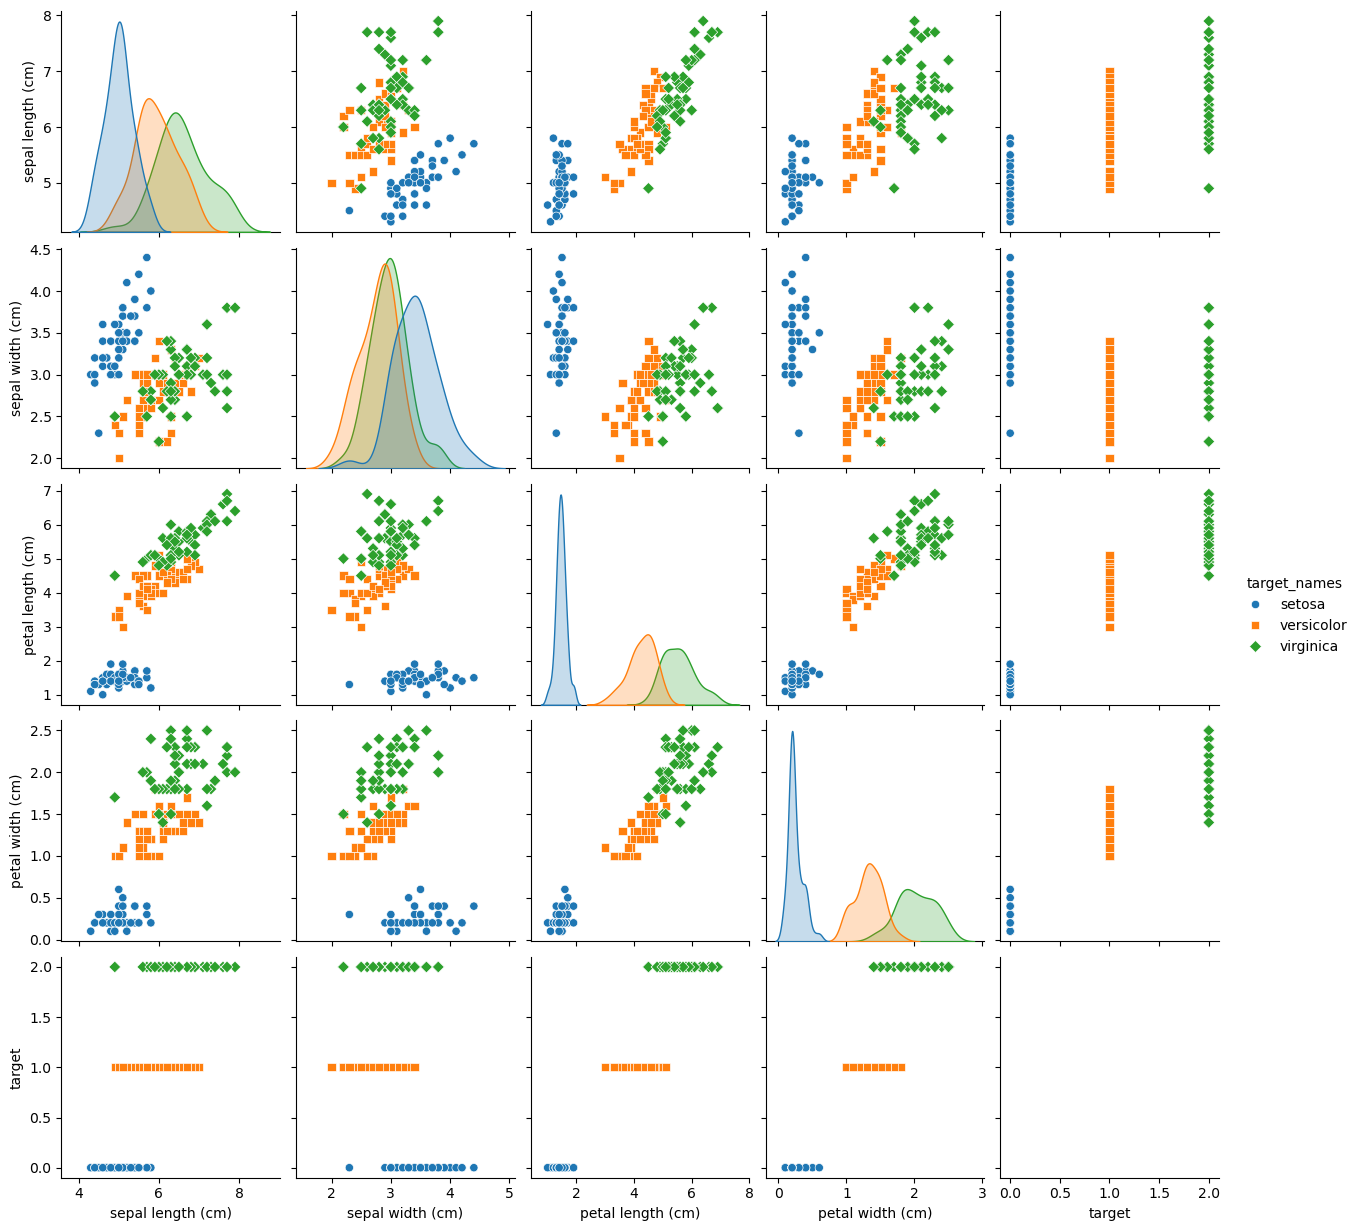

Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



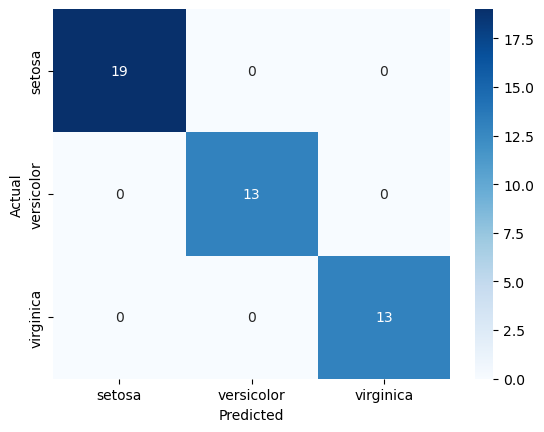

In [3]:

# 1. Setting up the Environment

#pip install pandas scikit-learn matplotlib seaborn

# 2. Loading the Dataset
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

print(df.head())


# 3. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, hue='target_names', markers=["o", "s", "D"])
plt.show()

# 4. Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Training the Model

from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = clf.predict(X_test)


# 7. Evaluating the Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
